In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [5]:
dataset = pd.read_csv("sentiment dataset.csv" , encoding= 'ISO-8859-1')

In [6]:
dataset.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [7]:
col_names = ['target' , 'id' , 'date' , 'flag' , 'user' , 'text']
dataset.columns = col_names

In [8]:
dataset.head()

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [9]:
dataset.shape

(1048572, 6)

In [10]:
#checking for missing values
dataset.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [11]:
# Distribution of tweets
dataset['target'].value_counts()

target
0    799996
4    248576
Name: count, dtype: int64

In [12]:
# Converting 0 to -ve and 4 to +ve
dataset['target'] = dataset['target'].map({0:0 , 4:1})

In [13]:
dataset['target'].value_counts()

target
0    799996
1    248576
Name: count, dtype: int64

In [15]:
# Stemming

stremmer = PorterStemmer()

def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content) # removing not a-z and A-Z
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [stremmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [16]:
dataset['text'] = dataset['text'].apply(stemming)

In [17]:
dataset.head()

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset updat facebook text might cri result sch...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dive mani time ball manag save rest g...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole bodi feel itchi like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass behav mad see
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,kwesidei whole crew


In [18]:
x = dataset['text']
y = dataset['target']

In [19]:
# splitting the dataset
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

In [20]:
# convert textual data to numerical data
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [21]:
print(x_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6198292 stored elements and shape (838857, 328138)>
  Coords	Values
  (0, 38891)	0.400775143648158
  (0, 14592)	0.36261851892418073
  (0, 310440)	0.23944674945165806
  (0, 213360)	0.33741977246344723
  (0, 106715)	0.1976367684924913
  (0, 78032)	0.39706301209607425
  (0, 238401)	0.5830788261117192
  (1, 310440)	0.16815634344198596
  (1, 234536)	0.48130448708128454
  (1, 317696)	0.20514010986264616
  (1, 271849)	0.24304190125482247
  (1, 94523)	0.43038800147556905
  (1, 122944)	0.4035858443173664
  (1, 198441)	0.2870371557279857
  (1, 8855)	0.2240883171081635
  (1, 68179)	0.2864104053098128
  (1, 224365)	0.27598082539483954
  (2, 308903)	0.3260091681570522
  (2, 215352)	0.4044438546293875
  (2, 277744)	0.3822383090103777
  (2, 35126)	0.39464818697445025
  (2, 121997)	0.19090014442691997
  (2, 291621)	0.2875143207107189
  (2, 55892)	0.20543830173559866
  (2, 277759)	0.5166987795580361
  :	:
  (838853, 37072)	0.3073996032889281

In [22]:
# Training the model
model = LogisticRegression()
model.fit(x_train , y_train)

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
# Testing the model
y_pred = model.predict(x_test)
print(accuracy_score(y_test , y_pred))

0.8328731850368357


In [24]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Negative', 'Positive']

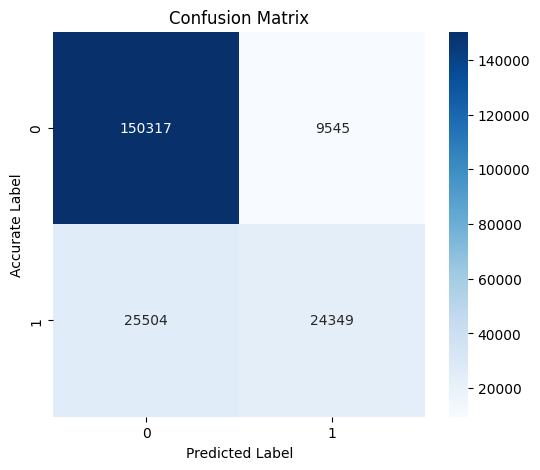

In [25]:
#confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Accurate Label')
plt.title('Confusion Matrix')
plt.show()

In [26]:
def evaluate(y,y_pred):
  tn=np.sum((y==1)&(y_pred==1))
  tp=np.sum((y!=1)&(y_pred!=1))
  fp=np.sum((y!=1)&(y_pred==1))
  fn=np.sum((y==1)&(y_pred!=1))
  print(f"tp:{tp},tn:{tn},fp:{fp},fn:{fn}")
  accuracy=(tp+tn)/(tp+tn+fp+fn)
  precision=tp/(tp+fp) if (tp+fp)!=0 else 0
  recall = tp / (tp + fn) if (tp + fn) != 0 else 0
  f1_score=2*precision*recall/(precision+recall)
  return accuracy,precision,recall,f1_score
print(y_test.shape)
accuracy,precision,recall,f1_score=evaluate(y_test,y_pred)
print(f"accuracy:{accuracy},precision:{precision},recall:{recall},f1_score:{f1_score}")

(209715,)
tp:150317,tn:24349,fp:9545,fn:25504
accuracy:0.8328731850368357,precision:0.9402922520674082,recall:0.8549433799147997,f1_score:0.8955889931870248


In [27]:
# Function to predict the sentiment
def predict_sentiment(text):
    text = re.sub('[^a-zA-Z]',' ',text) # removing not a-z and A-Z
    text = text.lower()
    text = text.split() 
    text = [stremmer.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    text = [text]
    text = vectorizer.transform(text)   
    sentiment = model.predict(text)
    if sentiment == 0:
        return "Negative"
    else:
        return"Positive"

In [28]:
# Testing the model
print(predict_sentiment("I love this Subject."))
print(predict_sentiment("I hate this season."))

Positive
Negative


In [29]:
# Save the model
import pickle
pickle.dump(model , open('model.pkl' , 'wb'))

In [30]:
pickle.dump(vectorizer , open('vectorizer.pkl' , 'wb'))